# Import Pakage

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [36]:
df=pd.read_csv('Fuel_Consumption_2000-2022.csv')
df.columns=df.columns.str.lower()
df.columns=df.columns.str.replace(' ','_')
df['make']=df['make'].str.lower()

df.head(10)

,year,make,model,vehicle_class,engine_size,cylinders,transmission,fuel,fuel_consumption,hwy_(l/100_km),comb_(l/100_km),comb_(mpg),emissions
0,2000,acura,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,acura,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,acura,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,acura,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,acura,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198
5,2000,acura,INTEGRA,SUBCOMPACT,1.8,4,M5,X,9.3,6.8,8.2,34,189
6,2000,acura,INTEGRA GSR/TYPE R,SUBCOMPACT,1.8,4,M5,Z,9.4,7.0,8.3,34,191
7,2000,acura,NSX,SUBCOMPACT,3.0,6,AS4,Z,13.6,9.2,11.6,24,267
8,2000,acura,NSX,SUBCOMPACT,3.2,6,M6,Z,13.8,9.1,11.7,24,269
9,2000,audi,A4,COMPACT,1.8,4,A5,Z,11.4,7.2,9.5,30,218


# Data Cleanning and prepocessing

data cleanning bertujuan 

In [37]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22556 entries, 0 to 22555
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              22556 non-null  int64  
 1   make              22556 non-null  object 
 2   model             22556 non-null  object 
 3   vehicle_class     22556 non-null  object 
 4   engine_size       22556 non-null  float64
 5   cylinders         22556 non-null  int64  
 6   transmission      22556 non-null  object 
 7   fuel              22556 non-null  object 
 8   fuel_consumption  22556 non-null  float64
 9   hwy_(l/100_km)    22556 non-null  float64
 10  comb_(l/100_km)   22556 non-null  float64
 11  comb_(mpg)        22556 non-null  int64  
 12  emissions         22556 non-null  int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 2.2+ MB


## Data Exploritations

In [38]:
def visual_count(x,y,size=(20,10),title='',x_label='',y_label="",model='h'):
    fig=plt.figure(figsize=size)
    ax=fig.add_subplot()
    plt.title(title,fontsize=30)
    barplot=ax.barh(x,y)
    ax.set_ylabel(y_label,fontsize=25)
    ax.set_xlabel(x_label,fontsize=25)
        
    
    max_value=max(y)
    for index in range(len(barplot)):
        if y[index] == max_value:
            barplot[index].set_color('red')
        else:
            barplot[index].set_color('grey')
    ax.set_yticks(list(x))
    ax.set_ylabel(y_label,fontsize=25)
    ax.set_xlabel(x_label,fontsize=25)
    ax.bar_label(barplot)

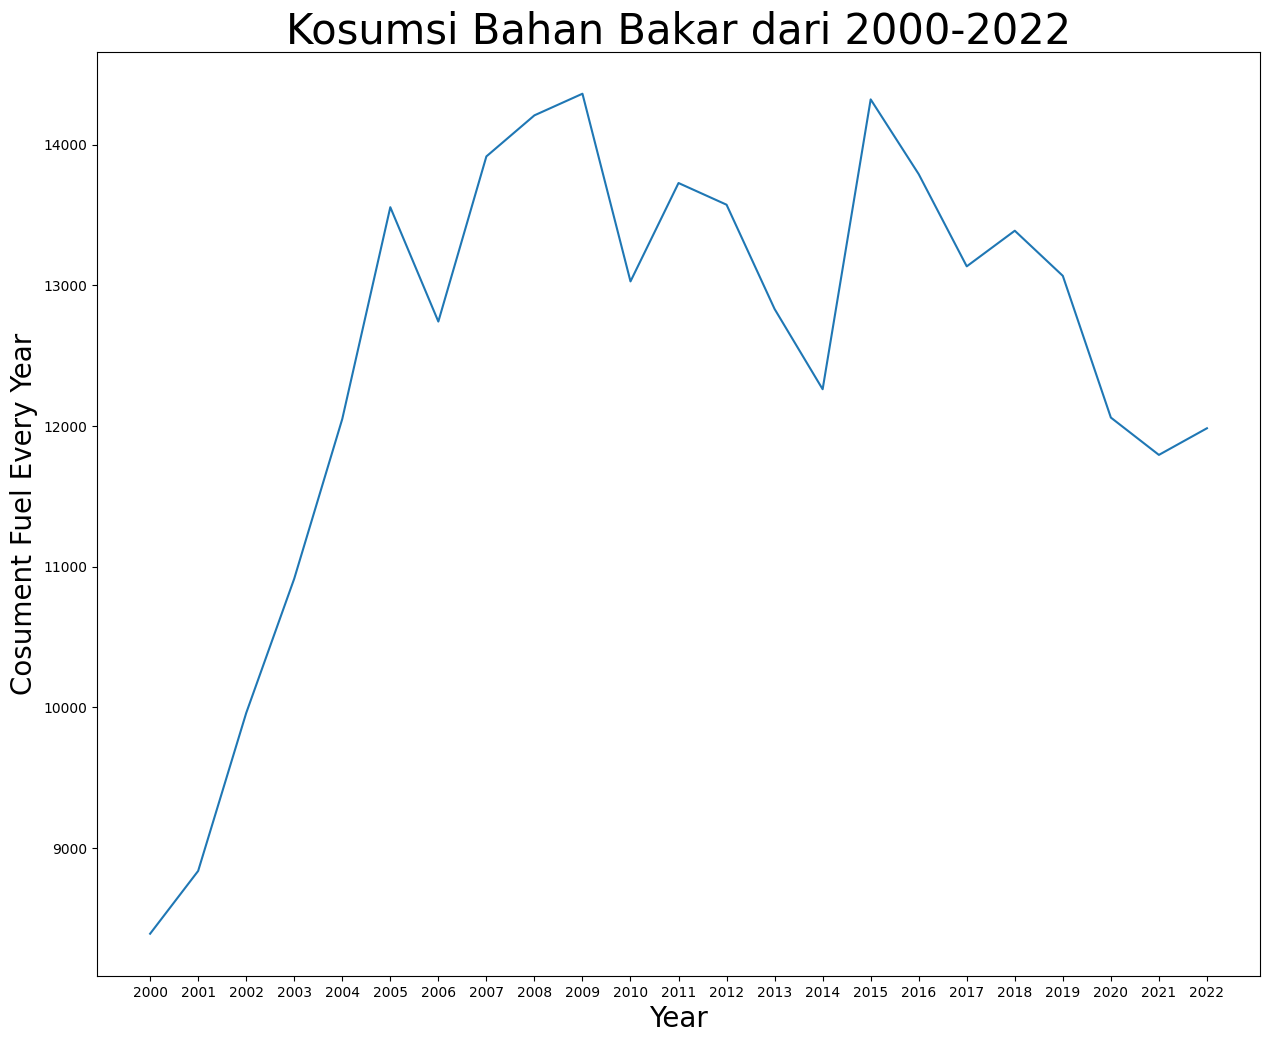

In [39]:
model_consumnt=df.groupby(['year'])['fuel_consumption'].sum()
model_consumnt=model_consumnt.reset_index()
fig=plt.figure(figsize=(15,12))
ax=fig.subplots()
sns.lineplot(data=model_consumnt,x='year',y='fuel_consumption',markers=True,dashes=False)
ax.set_title('Kosumsi Bahan Bakar dari 2000-2022',fontsize=30)
ax.set_ylabel('Cosument Fuel Every Year',fontsize=20)
ax.set_xlabel('Year',fontsize=20)
ax.set_xticks(model_consumnt['year'],fontsize=10)
plt.show()
# visual_count()

## Uji Distribusi Normal

/tmp/ipykernel_11120/2128368144.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["fuel_consumption"])


Text(0.5, 38.00000000000001, 'Konsumsi Bahan Bakar')

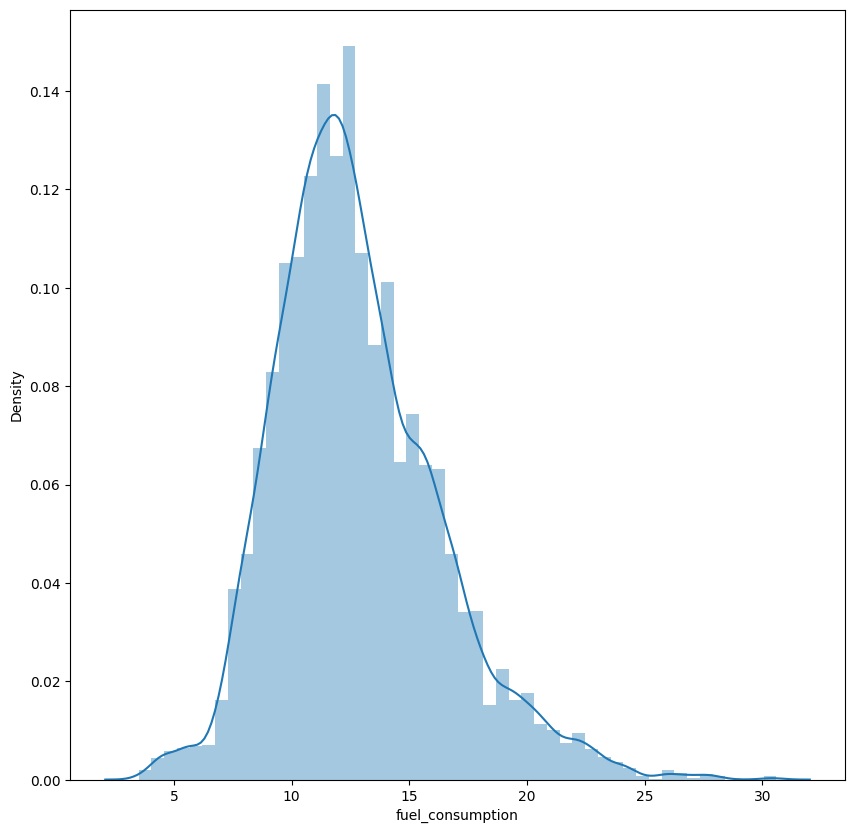

In [40]:
# pemeriksaan Normalitas pada varuavek dependent 
fig, axes = plt.subplots(figsize=(10, 10))
sns.distplot(df["fuel_consumption"])
ax.set_xlabel('Konsumsi Bahan Bakar')


bahwa distribusi fuel_consumption,bahwa pesebaran pada fitur fuel_consumption


## Jumlah Emisi

<AxesSubplot: ylabel='emissions'>

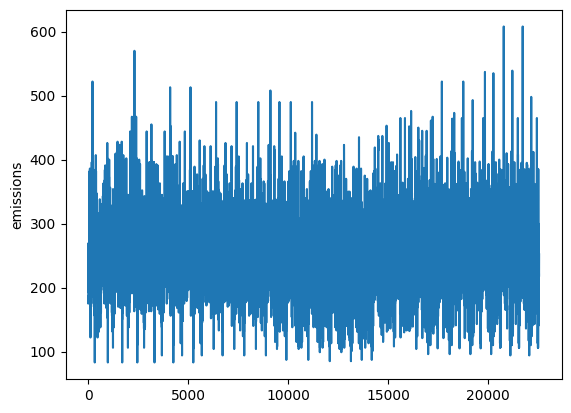

In [41]:
sns.lineplot(df['emissions'])

# tingkat Konsumsi bahan Bakar

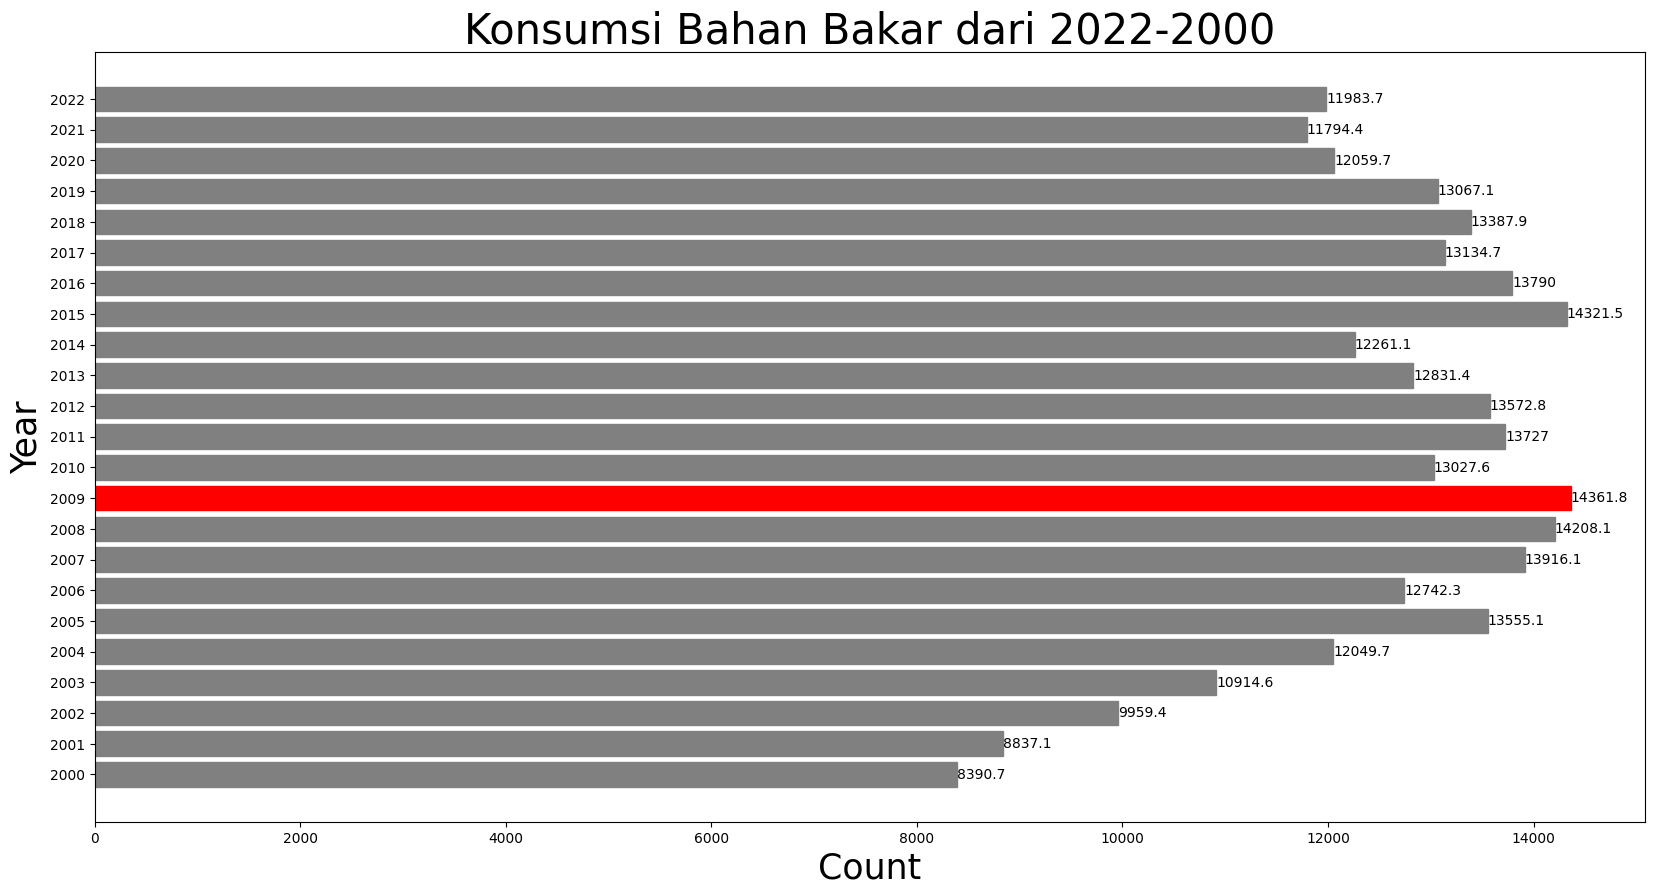

In [42]:
visual_count(model_consumnt['year'],model_consumnt['fuel_consumption'],title="Konsumsi Bahan Bakar dari 2022-2000",x_label="Count",y_label="Year")

dengan visual diatas bahwa terbanyak jumlah konsumsi bahan bakar terjadi 2009

# Jumlah Kendaraan Yang Terbit per tahun

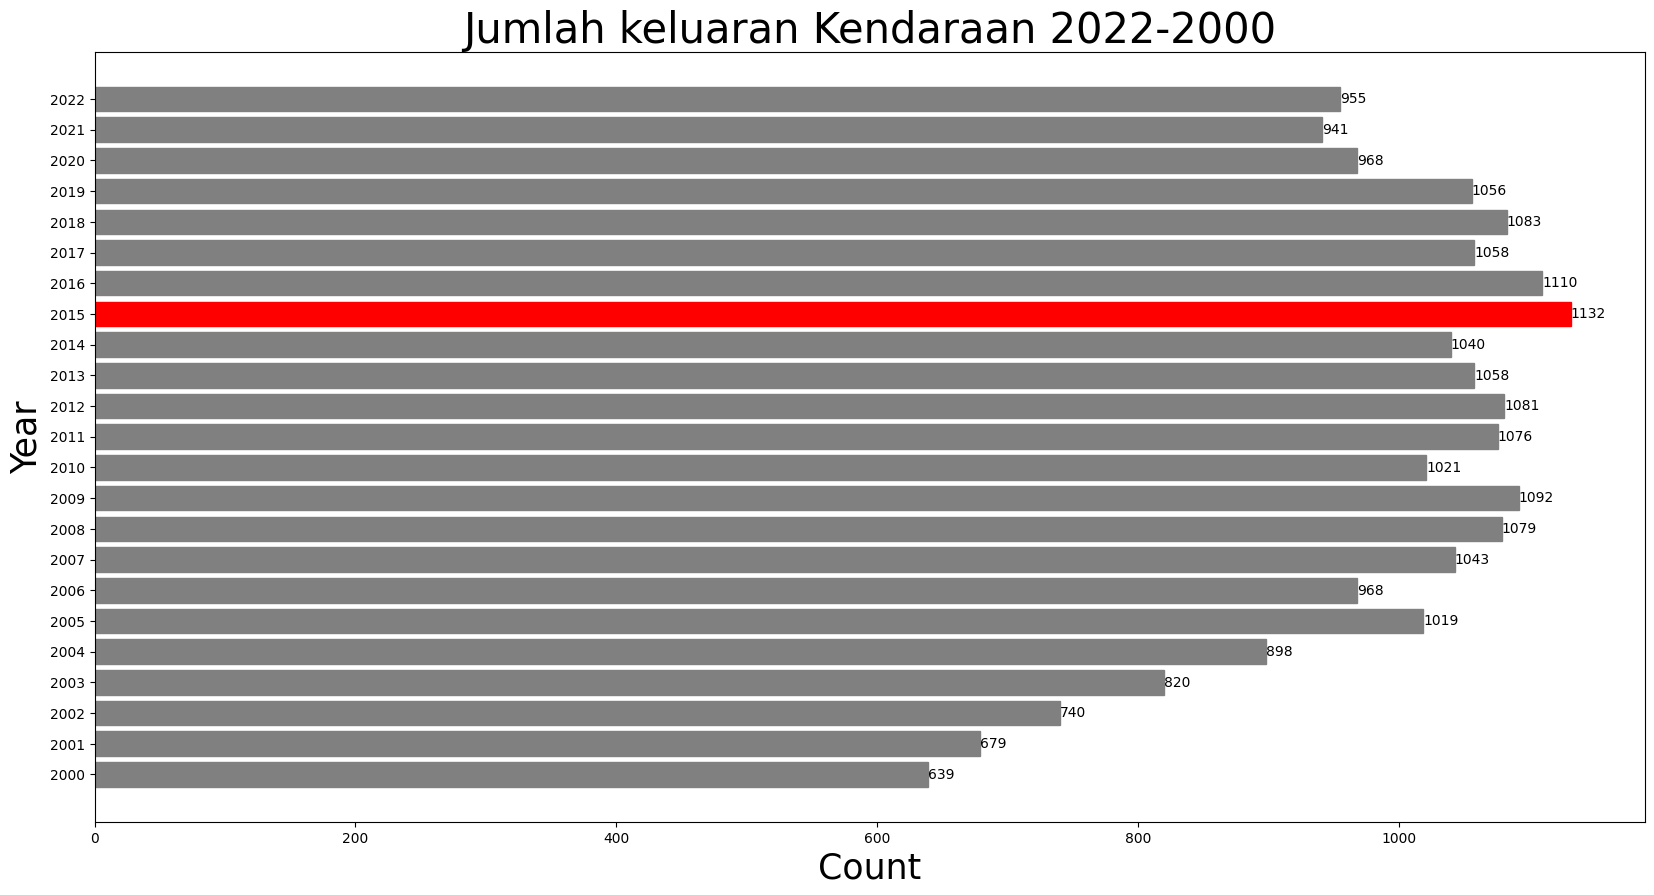

In [43]:
count_vec=df['year'].value_counts()
visual_count(x=count_vec.keys(),y=count_vec.values,title='Jumlah keluaran Kendaraan 2022-2000',x_label="Count",y_label="Year",model='v')


jumlah keluaran di kendaraan tertinggi pada tahun 2015

In [44]:
count_type_full=(df['fuel'].value_counts())
(count_type_full)

X    11822
Z     9316
E     1071
D      314
N       33
Name: fuel, dtype: int64

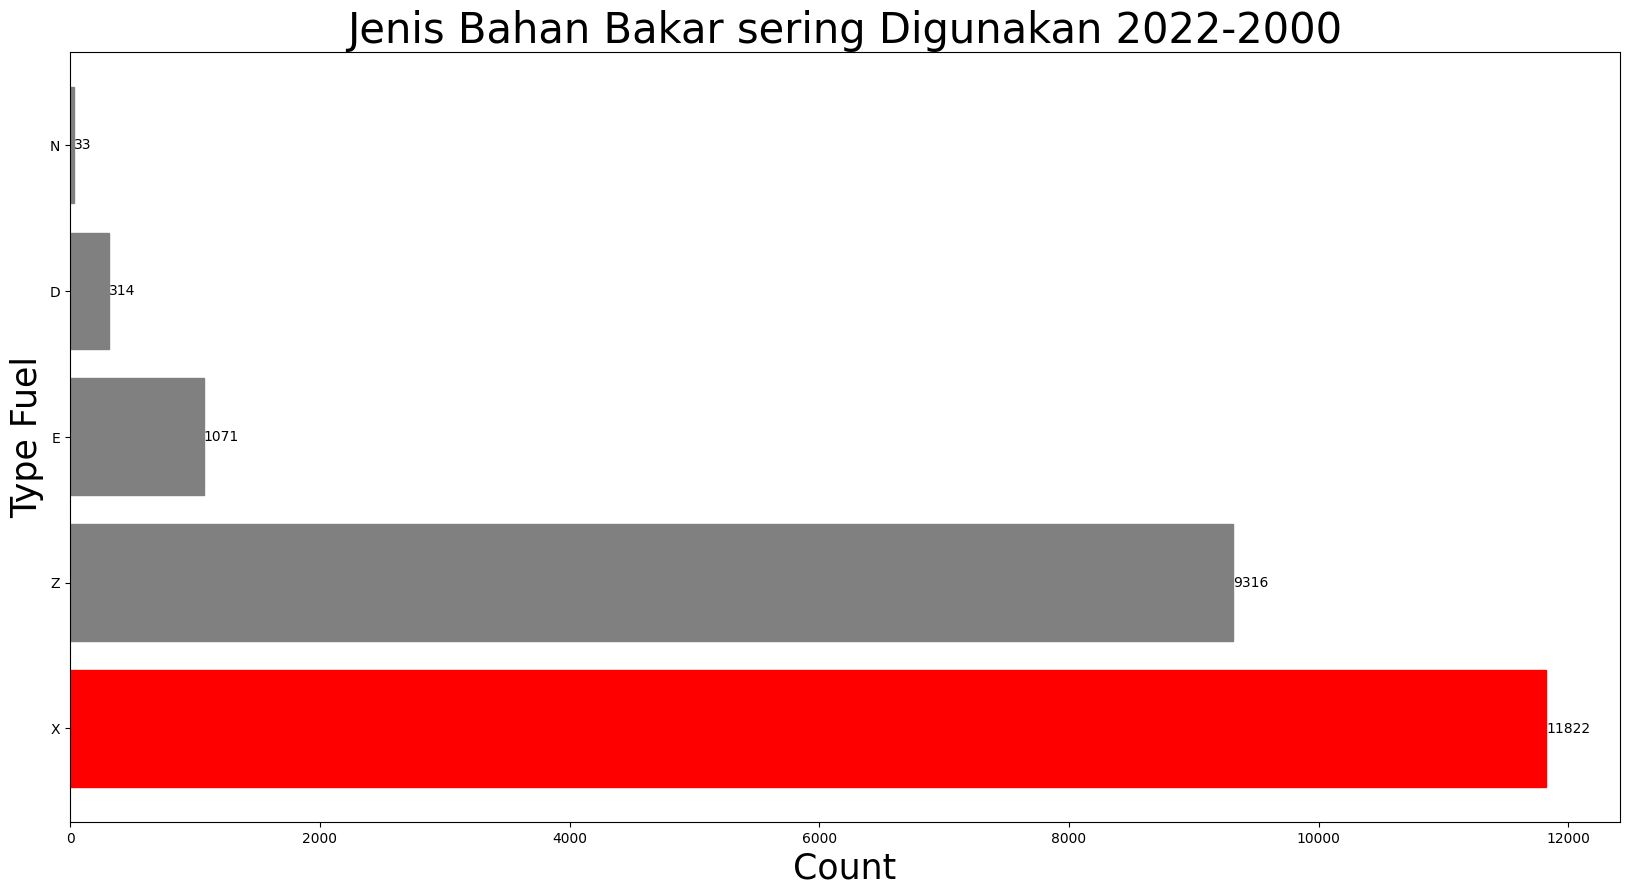

In [45]:
# jenis Bahan Bakar dengan pakai terbesar
count_type_full=df['fuel'].value_counts()
visual_count(count_type_full.keys(),count_type_full.values,title="Jenis Bahan Bakar sering Digunakan 2022-2000",x_label="Count",y_label="Type Fuel")

Jenis Bahan Bakar dengan daya kosumsi 


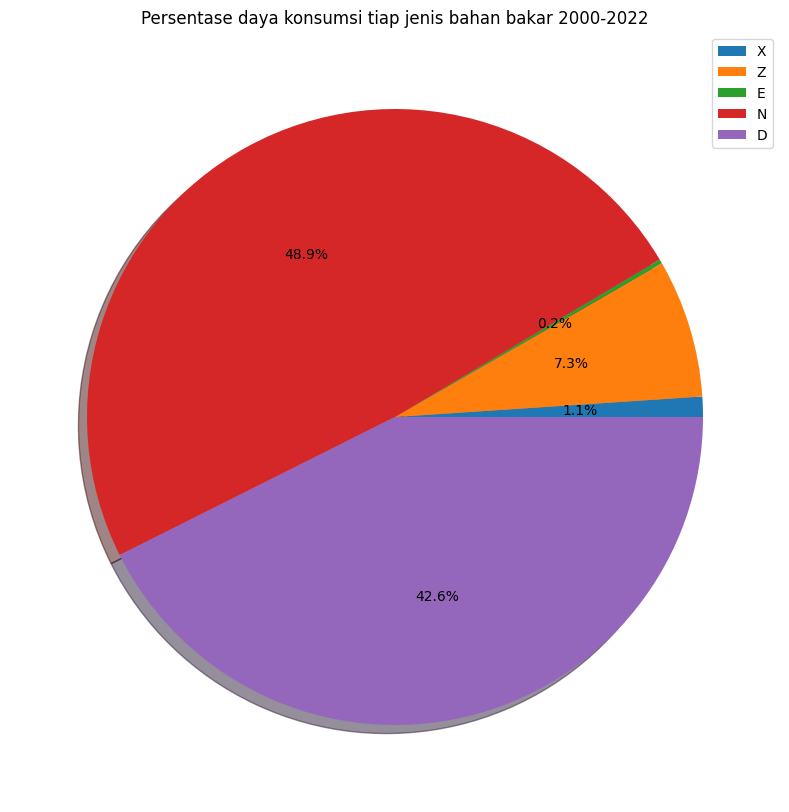

In [46]:
power_type_fully=df.groupby('fuel')['fuel_consumption'].sum()
(power_type_fully.sort_values(ascending=False))
fig=plt.figure(figsize=(15,10))
ax=fig.add_subplot()
ax.set_title('Persentase daya konsumsi tiap jenis bahan bakar 2000-2022')
ax.pie(power_type_fully, autopct='%1.1f%%',shadow=True)
plt.grid()
ax.legend(labels=df['fuel'].unique())


Persentase pada banyaknya penggunaan bahan bakar

## jenis Mesin Di dalam merek mobil


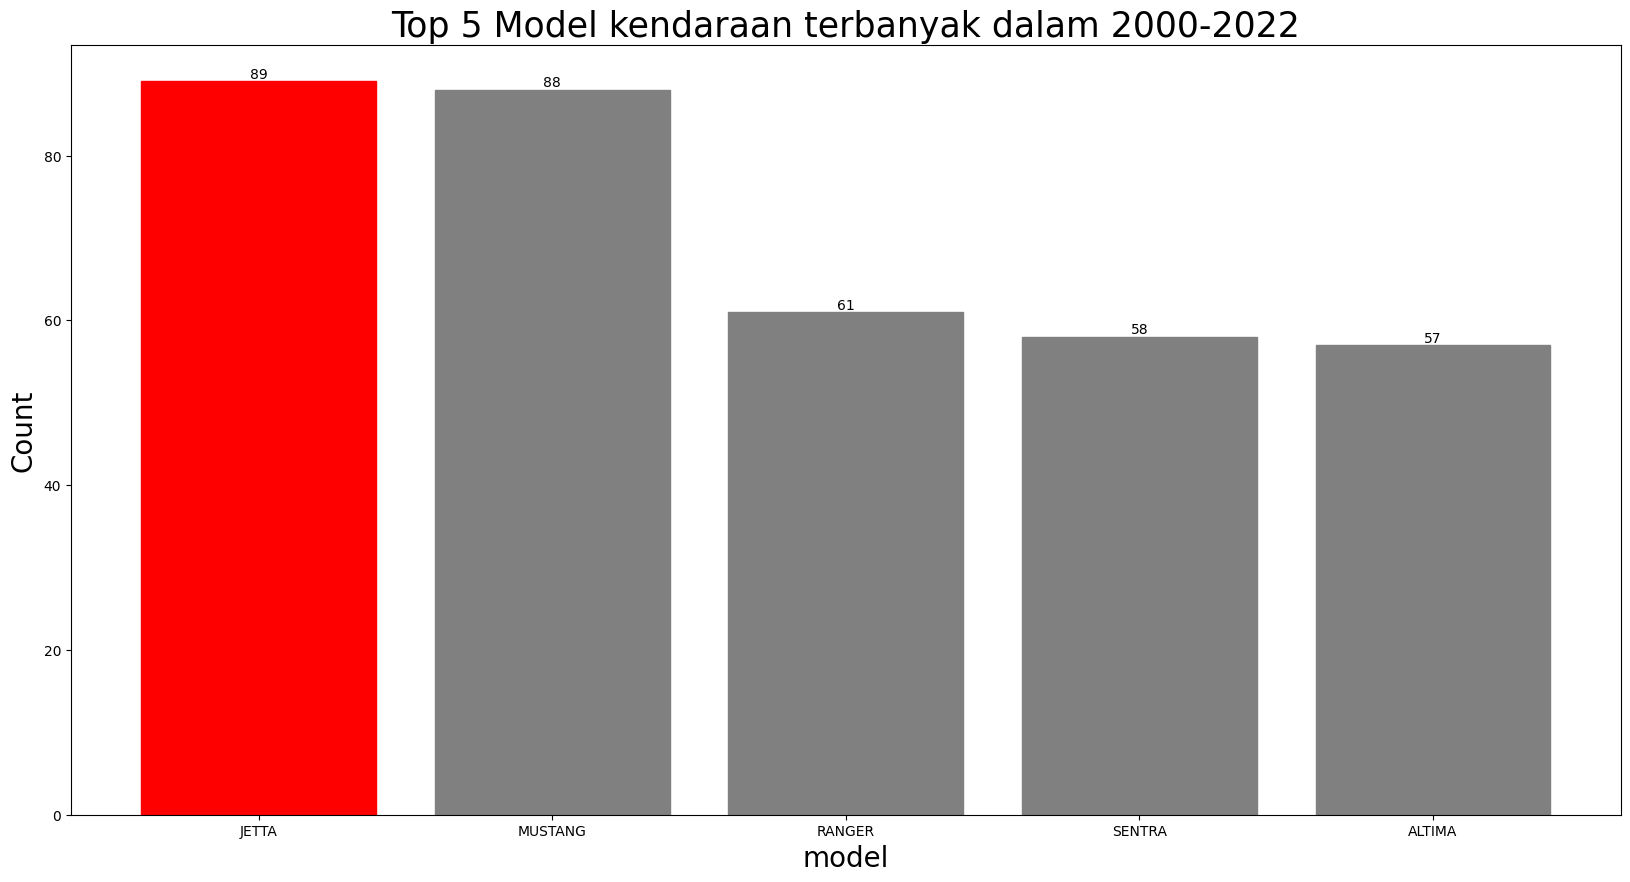

In [47]:
# mari kita visualisasi data
count_model_machine=df['model'].value_counts()
fig=plt.figure(figsize=(20,10))
ax=fig.subplots()
plt.title("Top 5 Model kendaraan terbanyak dalam 2000-2022",fontsize=25)
plt.ylabel('Count',fontsize=20)
plt.xlabel('model',fontsize=20)
barplot=plt.bar(count_model_machine[:5].keys(),count_model_machine[:5].values)
max_value=max(count_model_machine[:5].values)
for index in range(len(barplot)):
    if count_model_machine[:5].values[index] == max_value:
        barplot[index].set_color('red')
    else:
        barplot[index].set_color('grey')
ax.bar_label(barplot)
plt.show()



model paling banyak dari 2000-2022

<!-- mengetahui model mobil dengan penggunaan kosumsi bahan bakar -->

## konsumsi bahan bakar pada tiap model Top 5

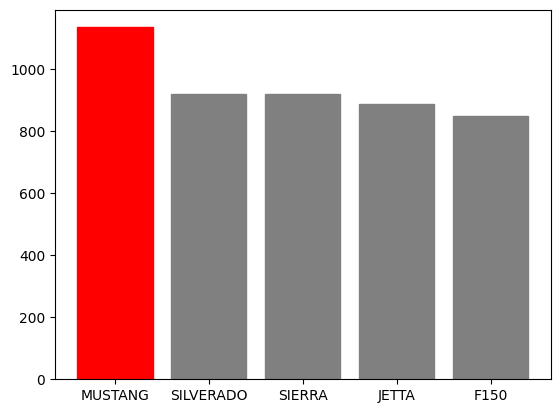

In [58]:
model_fuel_consum = df.groupby(['model'])['fuel_consumption'].sum().reset_index()
model_fuel_consum.sort_values(by='fuel_consumption', ascending=False, inplace=True)

barplot = plt.bar(model_fuel_consum['model'].iloc[:5], model_fuel_consum['fuel_consumption'].iloc[:5])
max_value = model_fuel_consum['fuel_consumption'].iloc[0]

for i in range(5):
    if model_fuel_consum['fuel_consumption'].iloc[i] == max_value:
        barplot[i].set_color('red')
    else:
        barplot[i].set_color('grey')

    ax.bar_label(barplot)

# Heat Map

/tmp/ipykernel_11120/1759653485.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,fmt=f'.2f')


<AxesSubplot: >

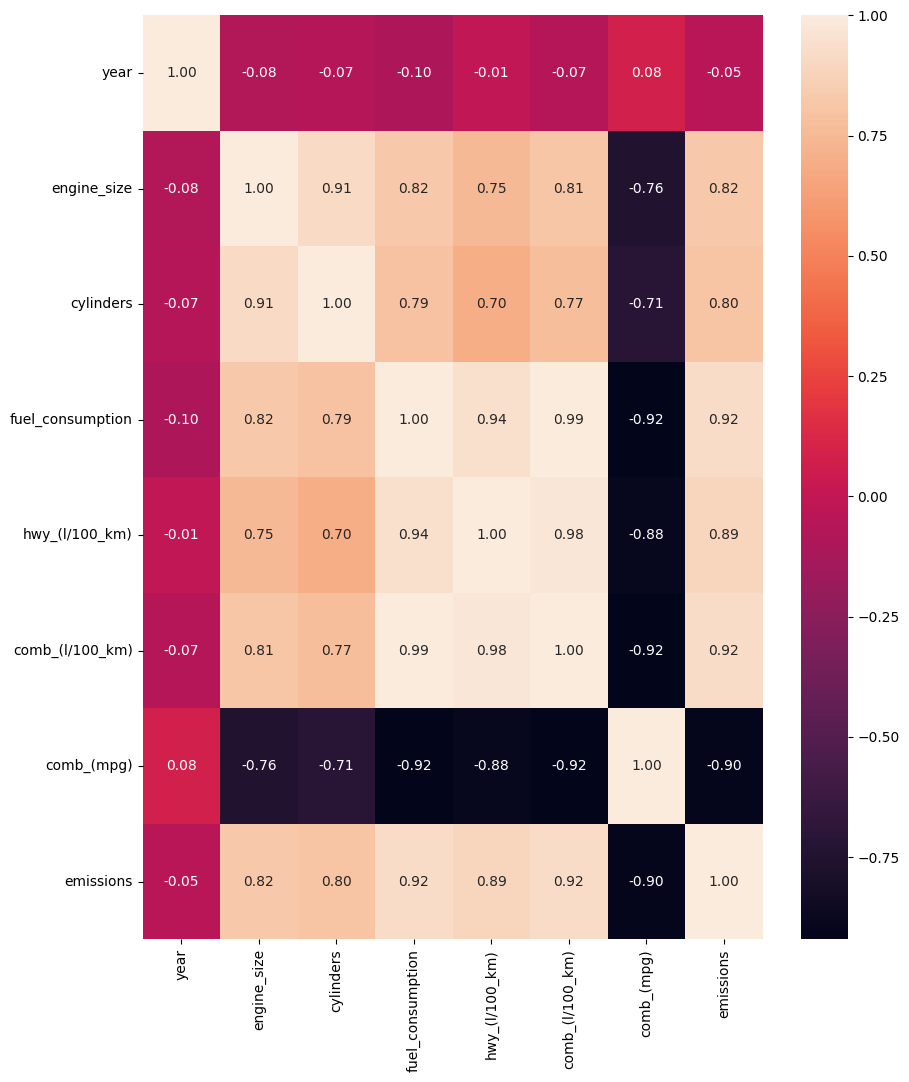

In [50]:
plt.figure(figsize=(10,12))
sns.heatmap(df.corr(),annot=True,fmt=f'.2f')

# Model Machine Learning
